In [23]:
import numpy as np
import sys
sys.path.append(module_path)
import pandas as pd
import math
import matplotlib.pyplot as plt
import time, datetime
import corner
np.random.seed(999)

In [136]:
original_directory = '/scratch/data/galcats/P200/'
destination_directory = '/home/magnus/data/galcats_nonzero_sfr_no_density/'
file_name = 'galaxies.Z80.h5'

In [137]:
galfile = pd.read_hdf(original_directory + file_name)
galaxies = galfile.as_matrix()
gal_header = galfile.keys().tolist()
print(gal_header)

['X_pos', 'Y_pos', 'Z_pos', 'X_vel', 'Y_vel', 'Z_vel', 'Halo_mass', 'Stellar_mass', 'SFR', 'Intra_cluster_mass', 'Halo_mass_peak', 'Stellar_mass_obs', 'SFR_obs', 'Halo_radius', 'Concentration', 'Halo_spin', 'Scale_peak_mass', 'Scale_half_mass', 'Scale_last_MajM', 'Type']


In [138]:
data_dict = {'X_pos': 0, 'Y_pos': 1, 'Z_pos': 2, 'X_vel': 3, 'Y_vel': 4, 'Z_vel': 5, 'Halo_mass': 6, 
             'Stellar_mass': 7, 'SFR': 8, 'Intra_cluster_mass': 9, 'Halo_mass_peak': 10, 'Stellar_mass_obs': 11, 
             'SFR_obs': 12, 'Halo_radius': 13, 'Concentration': 14, 'Halo_spin': 15, 'Scale_peak_mass': 16, 
             'Scale_half_mass': 17, 'Scale_last_MajM': 18, 'Type': 19}#, 'Environmental_density': 20}

## Modify SFR

In [139]:
ssfr = galaxies[:, data_dict['SFR']] / np.power(10, galaxies[:, data_dict['Stellar_mass']])
print(len(ssfr[ssfr == 0]))
print(np.amax(ssfr))
print(np.amin(ssfr))

12
1.1868344e-08
0.0


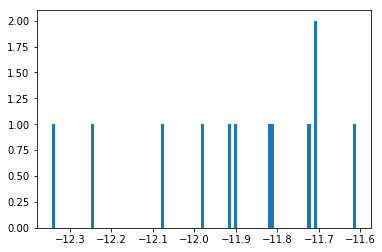

In [140]:
means = -12 * np.ones(np.count_nonzero(ssfr == 0))
dist = np.random.normal(means, .3)
plt.hist(dist, bins=100)
plt.show()

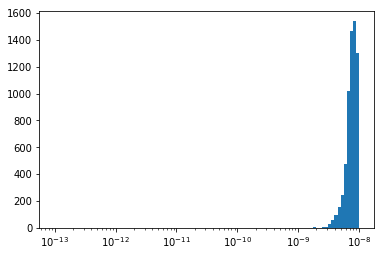

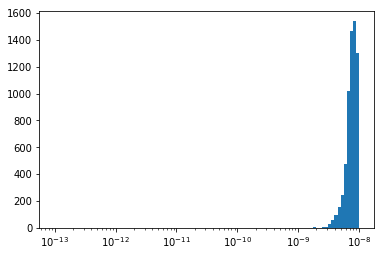

In [141]:
### Plot histogram over ssfr before and after the addition of the extra hump
bins = 10**np.linspace(-13, -8, 100)
plt.xscale('log')
plt.hist(ssfr[ssfr>0], bins=bins)
plt.show()

ssfr[ssfr == 0] = np.power(10, dist)

plt.xscale('log')
plt.hist(ssfr, bins=bins)
plt.show()

In [142]:
log_ssfr = np.log10(ssfr)
log_sfr = log_ssfr + galaxies[:, data_dict['Stellar_mass']]

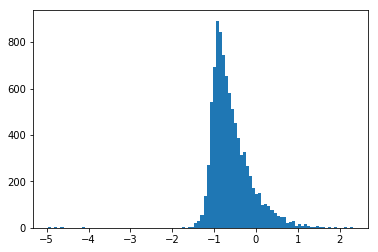

2.3130884
-4.9631047


In [143]:
plt.hist(log_sfr, bins = 100)
plt.show()

print(np.amax(log_sfr))
print(np.amin(log_sfr))

<function matplotlib.pyplot.show>

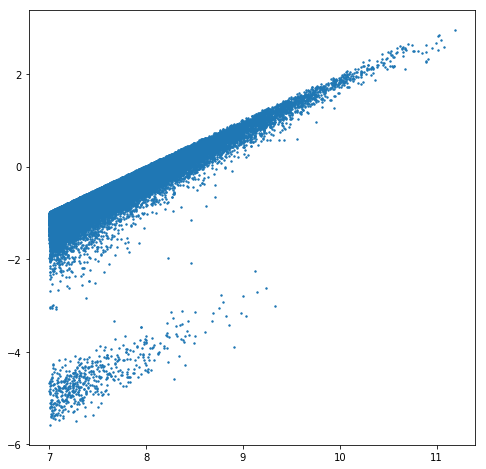

In [130]:
n_data_points = galaxies.shape[0]
subset_indices = np.random.choice(n_data_points, 50000, replace=False)

fig = plt.figure(figsize=(8,8))
plt.scatter(galaxies[subset_indices, data_dict['Stellar_mass']], log_sfr[subset_indices], s=2)
plt.show

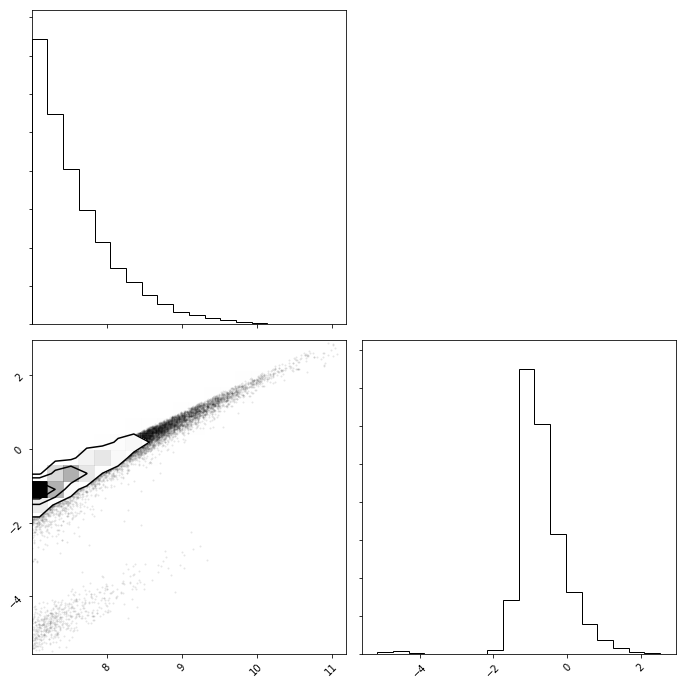

In [131]:
log_sfr_test = np.expand_dims(log_sfr, axis=1)
stellar_masses_test = np.expand_dims(galaxies[:, data_dict['Stellar_mass']], axis=1)

data = np.hstack((stellar_masses_test, log_sfr_test))


figure = corner.corner(data)
figure.set_size_inches(12, 12)
plt.show()

## Make a new pd dataset and save it

In [132]:
pd_dataframe = pd.DataFrame(data=galaxies, columns=gal_header)
pd_dataframe['SFR'] = log_sfr

In [133]:
pd_dataframe.to_hdf(destination_directory + file_name, 'w')

## Try loading the newly created galaxy catalogue

In [134]:
galfile = pd.read_hdf(destination_directory + file_name)
galaxies = galfile.as_matrix()
gal_header = galfile.keys().tolist()
print(gal_header)
print(np.shape(galaxies))

['X_pos', 'Y_pos', 'Z_pos', 'X_vel', 'Y_vel', 'Z_vel', 'Halo_mass', 'Stellar_mass', 'SFR', 'Intra_cluster_mass', 'Halo_mass_peak', 'Stellar_mass_obs', 'SFR_obs', 'Halo_radius', 'Concentration', 'Halo_spin', 'Scale_peak_mass', 'Scale_half_mass', 'Scale_last_MajM', 'Type']
(53994, 20)


In [135]:
print('%.2f' % (np.mean(galaxies[:,8])))
print('%.2f' % (np.amax(galaxies[:,8])))
print('%.2f' % (np.amin(galaxies[:,8])))
#print(np.sum(galaxies[:,6]) / 200**3)

-0.69
2.96
-5.58
